In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

1459 + 1460

# Eksik veri tespiti

**isna** fonksiyonu eksik verileri daha kolay bulmamızı sağlar

In [3]:
data = []
j = 0
for i in df:
    data.append(df.iloc[:, j:j+1].isna().sum())
    #print(data[j])
    j  += 1


eksik verileri olan kolonları tespit edelim
eksik verisi olan kolonlar / ne kadar eksik olduğu:
    LotFrontage    259
    Alley          1369
    MasVnrType     8
    MasVnrArea     8
    BsmtQual       37
    BsmtCond       37
    BsmtExposure   38
    BsmtFinType1   37
    BsmtFinType2   38
    Electrical     1
    FireplaceQu    690
    GarageType     81
    GarageYrBlt    81
    GarageFinish   81
    GarageQual     81
    GarageCond     81
    PoolQC         1453
    Fence          1179
    MiscFeature    1406
    
    

# Eksik veri görselleştirme

missingno kütüphanesi kullanılarak eksik veriler görselleştririlebilir

<AxesSubplot:>

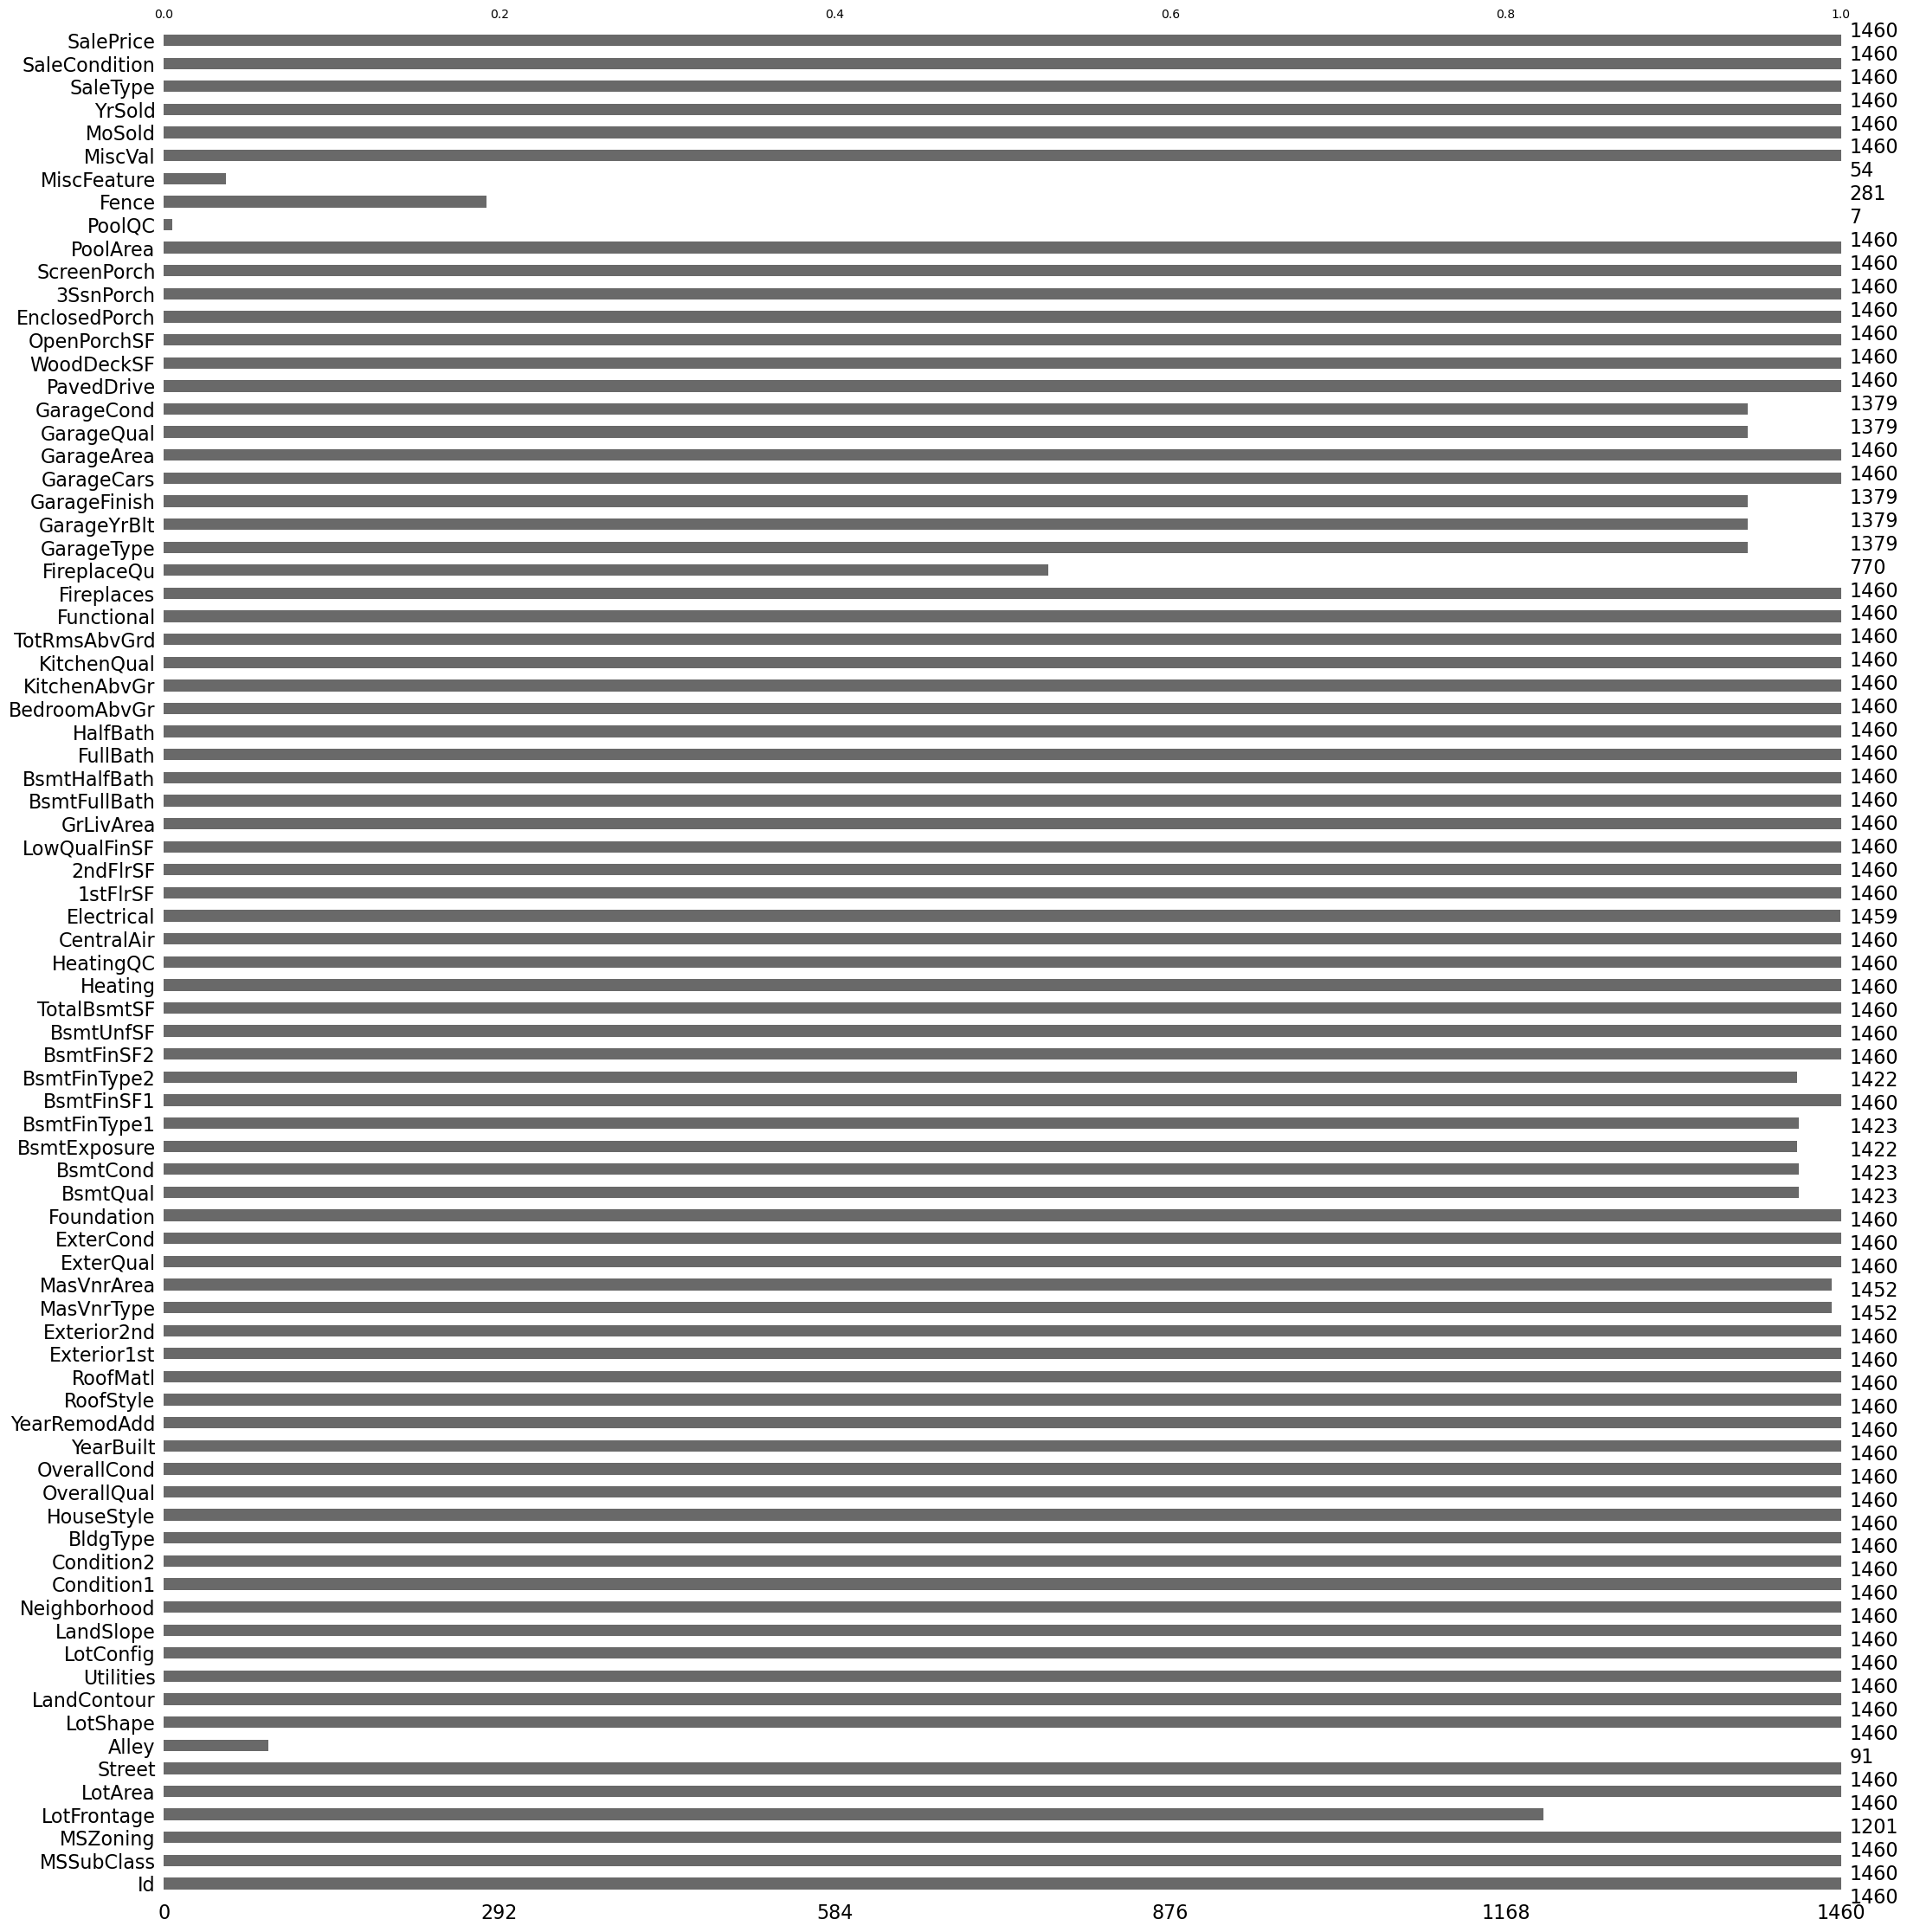

In [4]:
import missingno as msno
msno.bar(df)

# Eksik verilerde Deletion yöntemi

import warningsher kolonda 1460 veri var. eksik veri oranı %40'ın üzerinde olan kolonları modelde kullanmama kararı aldık. Bu yüzden Alley, FireplaceQu, PoolQC, fence, Miscfeature kolonlarına burada veda ediyoruz. Geri kalan kolonları uygun tekniklerle doldurmaya çalışacağız :)

In [5]:

total_data = df.shape[0]
column_shape = df.shape[1]
data = 0
i = 0
while (i <= column_shape):
    data = (df.iloc[:, i:i+1].isna().sum()/total_data) * 100
    data = data.to_numpy()
    if(data > 40):
        df = df.drop(df.iloc[:, i:i+1], axis = 1)           
    i += 1

#print(df.head(10))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


YAzdığım bu fonksiyon sayesinde belli bir eksik veri oranının üzerindeki kolonları kolayca silebilirsiniz. çıkan error mesajını görmezden gelebilirsiniz şimdilik. Onu daha sonra çözeceğim Ş:

# eksik veri doldurma yöntemleri

eksik veri türleri: tamamen rastgele, rastgele , rastgele değil.

# fillna

In [6]:
#df.iloc[:,3:4].fillna("sample")


fillna fonksiyonu ile eksik veriler istenilen değer ile doldurulabilir

# SimpleImputer

In [7]:

data = df["LotFrontage"]
print("data before modeling")
print(data.head(30))
data = data.values
data = data.reshape(-1,1)
from sklearn.impute import SimpleImputer
fea_transformer = SimpleImputer(strategy="median")
values = fea_transformer.fit_transform(data)
data = pd.DataFrame(values)
print("data after modeling")
print(data.head(30))



data before modeling
0      65.0
1      80.0
2      68.0
3      60.0
4      84.0
5      85.0
6      75.0
7       NaN
8      51.0
9      50.0
10     70.0
11     85.0
12      NaN
13     91.0
14      NaN
15     51.0
16      NaN
17     72.0
18     66.0
19     70.0
20    101.0
21     57.0
22     75.0
23     44.0
24      NaN
25    110.0
26     60.0
27     98.0
28     47.0
29     60.0
Name: LotFrontage, dtype: float64
data after modeling
        0
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    69.0
8    51.0
9    50.0
10   70.0
11   85.0
12   69.0
13   91.0
14   69.0
15   51.0
16   69.0
17   72.0
18   66.0
19   70.0
20  101.0
21   57.0
22   75.0
23   44.0
24   69.0
25  110.0
26   60.0
27   98.0
28   47.0
29   60.0


eksik veriler **simpleimputer** yöntemi ile de doldurulabilir. Simpleimputer yöntemi verileri *mean*(ortalama), *median*(medyan),*most_frequent* (mod) değerleri ile doldurur. Yukarıdaki örnekte LotFrontage kolonu median değeri ile dolduruldu.

# KNN algoritması ile eksik veri doldurma

In [8]:
data = df["LotFrontage"]
print("data before modeling")
print(data.head(30))
data = data.values
data = data.reshape(-1,1)
from sklearn.impute import KNNImputer
fea_transformer = KNNImputer(n_neighbors=3)
values = fea_transformer.fit_transform(data)
data = pd.DataFrame(values)
print("data after modeling")
print(data.head(30))

data before modeling
0      65.0
1      80.0
2      68.0
3      60.0
4      84.0
5      85.0
6      75.0
7       NaN
8      51.0
9      50.0
10     70.0
11     85.0
12      NaN
13     91.0
14      NaN
15     51.0
16      NaN
17     72.0
18     66.0
19     70.0
20    101.0
21     57.0
22     75.0
23     44.0
24      NaN
25    110.0
26     60.0
27     98.0
28     47.0
29     60.0
Name: LotFrontage, dtype: float64
data after modeling
             0
0    65.000000
1    80.000000
2    68.000000
3    60.000000
4    84.000000
5    85.000000
6    75.000000
7    70.049958
8    51.000000
9    50.000000
10   70.000000
11   85.000000
12   70.049958
13   91.000000
14   70.049958
15   51.000000
16   70.049958
17   72.000000
18   66.000000
19   70.000000
20  101.000000
21   57.000000
22   75.000000
23   44.000000
24   70.049958
25  110.000000
26   60.000000
27   98.000000
28   47.000000
29   60.000000


Eksik veriler makine öğrenmesi modelleri ile de doldurulabilir. yukarıda knn algoritması ile LotFrontage kolonunu doldurduk

# Yöntem seçimi

Eksik veri doldurma yöntemlerinden birkaçını tanıdığımıza göre hangi kolonda hangi yöntemi kullanacağımıza kara vermeliyiz

<AxesSubplot:>

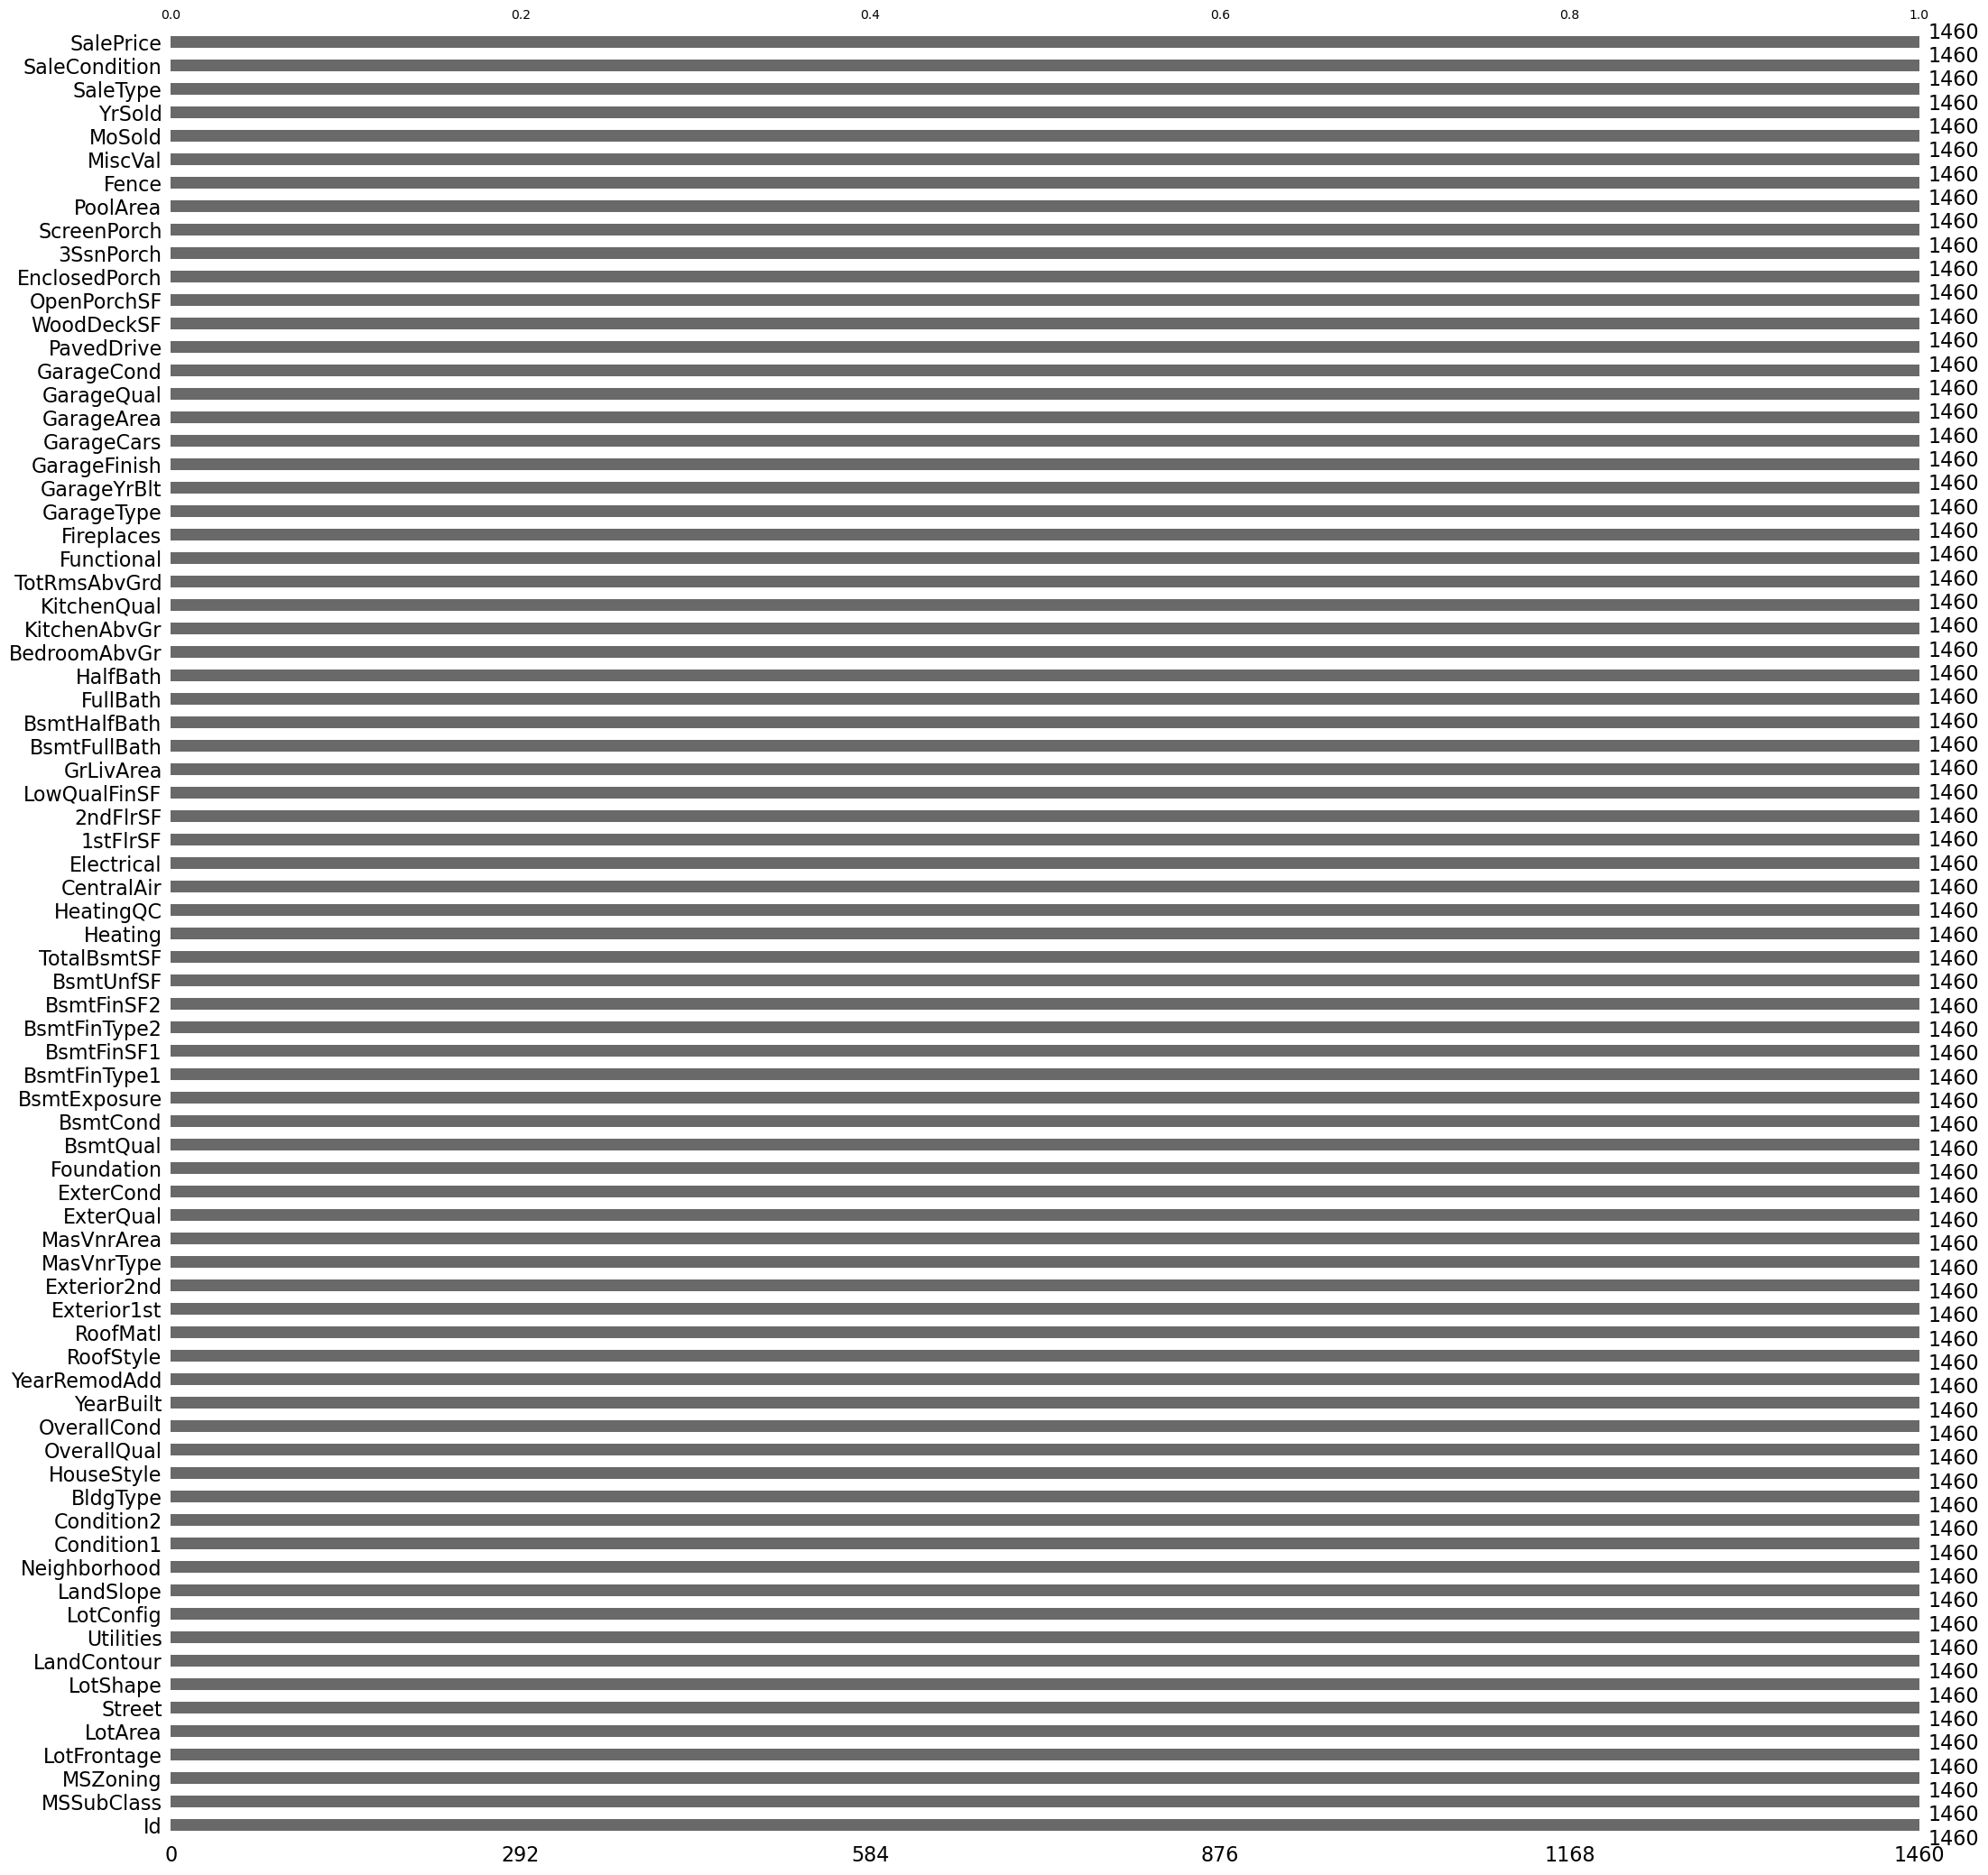

In [9]:
df = df.fillna(df.mode().iloc[0])
msno.bar(df)

Eksik veriler doldurulduğuna göre bir sonraki adıma geçebiliriz

# Kategorik verileri nümeric veriye çevirme

Tahmin modelleri sadece sayısal veriler ile çalıştığından kategorik verileri nümerik verilere çevirmeliyiz.

In [10]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        

Buradaki kod parçacığı sayesinde veri setindeki tüm kategorik veriler numerşc veriye dönüştürülür.

# Model oluşturma

Veri setimizi seçtiğimiz modele sokabiliriz artık


In [11]:

from sklearn.model_selection import train_test_split

y = df.iloc[:, 76:77]
y = y.values
x = df.iloc[:, : 76]
x = x.values
x_l = x
y_l = y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x_sc = sc_X.fit_transform(x)
y_sc = sc_y.fit_transform(y)
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y_sc, test_size=0.20, random_state=42)


Bu modelde ev fiyatlarını tahmin etmek istediğimizden bağımlı değişken(y) ev fiyatlarıdır. Bağımız değişkenler geriye kalan tüm kolonlardır. Eğitim verimiz veri setinin 80/100'ünü oluşturuyor. Kullanacağımız bazı modeller ölçeklendirilmiş veriler ile çalıştığından verilerin ölçeklendirilmiş halini de oluşturduk.

# Birkaç modeli deneyerek. En iyi modeli bulmaya çalışacağız.

# 1. Multiple linear regression

In [12]:
"""
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)
print(r2_score(y_test, predictions))
"""


'\nfrom sklearn import linear_model\n\nregr = linear_model.LinearRegression()\nregr.fit(x_train, y_train)\npredictions = regr.predict(x_test)\nprint(r2_score(y_test, predictions))\n'

r^2 değeri 0.846 çıktı bu iy bir değer fakat daha iy hale getirebiliriz.

In [13]:
"""
j = 0
for i in y:
    j+= 1
plt.scatter(y_test, predictions , color="r")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
"""

'\nj = 0\nfor i in y:\n    j+= 1\nplt.scatter(y_test, predictions , color="r")\nplt.xlabel("X")\nplt.ylabel("Y")\nplt.show()\n'

# 2. Polynnomial regression 

In [14]:
"""
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

#include bias parameter
lr = linear_model.LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))
"""

'\nfrom sklearn.preprocessing import PolynomialFeatures\n\npoly = PolynomialFeatures(degree=2, include_bias=True)\nx_train_trans = poly.fit_transform(x_train)\nx_test_trans = poly.transform(x_test)\n\n#include bias parameter\nlr = linear_model.LinearRegression()\nlr.fit(x_train_trans, y_train)\ny_pred = lr.predict(x_test_trans)\nprint(r2_score(y_test, y_pred))\n'

Polynnomial regression modelinin bu veri setine uygun olmadığı sonucunda vardık.

# 3. Support Vector Machine regression

In [15]:

"""
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_sc, y_train_sc)
y_pred = regressor.predict(x_test_sc)
print(r2_score(y_test_sc, y_pred))
"""

"\nfrom sklearn.svm import SVR\nregressor = SVR(kernel = 'rbf')\nregressor.fit(x_train_sc, y_train_sc)\ny_pred = regressor.predict(x_test_sc)\nprint(r2_score(y_test_sc, y_pred))\n"

SVM algoritmasının sonucunda r^2  değeri 0.759 çıktı. 

# 4. Logistic regression 

In [16]:

"""
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=800)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
print(r2_score(y_test_sc, predictions))
"""

"\nfrom sklearn.linear_model import LogisticRegression\nlogisticRegr = LogisticRegression(solver='lbfgs', max_iter=800)\nlogisticRegr.fit(x_train, y_train)\npredictions = logisticRegr.predict(x_test)\nprint(r2_score(y_test_sc, predictions))\n"

log regression da valueerror: unknown label type: 'continuous' hatası ile karşılaştım nasıl çözüleceği ile ilgili araşatırma yaptım fakat bulduğum tüm yollar işe yaramadı daha sonra daha kapsamlı araştıracağım bunu.

# Backward elemination 

Denedğimiz 4 algoritma arasında en iyisi linear regression çıktı. şimdi onu daha iyi hale getirmek için p değerleri yüksek olan kolonları sileceğiz.

# Linear regression before bacward elemination

In [17]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)
print(r2_score(y_test, predictions))

0.8467407298073726


In [18]:
import statsmodels.api as sm


model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              749.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:16:10   Log-Likelihood:                         -17163.
No. Observations:                1460   AIC:                                  3.447e+04
Df Residuals:                    1386   BIC:                                  3.487e+04
Df Model:                          74                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Her bir kolonun p değerini biliyoruz artık, şimdi p değeri 0.8'den yüksek kolonları silelim.

In [19]:
x = pd.DataFrame(x)
x = x.drop(x.iloc[:, 62:63], axis = 1)
x = x.drop(x.iloc[:, 59:60], axis = 1)
x = x.drop(x.iloc[:, 57:58], axis = 1)
x = x.drop(x.iloc[:, 50:51], axis = 1)
x = x.drop(x.iloc[:, 41:42], axis = 1)
x = x.drop(x.iloc[:, 10:11], axis = 1)
x = x.values

model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              804.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:16:10   Log-Likelihood:                         -17176.
No. Observations:                1460   AIC:                                  3.449e+04
Df Residuals:                    1392   BIC:                                  3.485e+04
Df Model:                          68                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

p değeri 0.8 üzerinde olan tüm kolonları sildik. r^2 değerimiz düştü bir de 0.6 üzerinde olan değerleri silelim.

In [20]:
x = pd.DataFrame(x)
x = x.drop(x.iloc[:, 65:68], axis = 1)
x = x.drop(x.iloc[:, 61:62], axis = 1)
x = x.drop(x.iloc[:, 54:55], axis = 1)
x = x.drop(x.iloc[:, 48:49], axis = 1)
x = x.drop(x.iloc[:, 46:47], axis = 1)
x = x.drop(x.iloc[:, 41:42], axis = 1)
x = x.drop(x.iloc[:, 38:39], axis = 1)
x = x.drop(x.iloc[:, 10:11], axis = 1)
x = x.values

model = sm.OLS(y,x).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              912.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:16:10   Log-Likelihood:                         -17192.
No. Observations:                1460   AIC:                                  3.450e+04
Df Residuals:                    1401   BIC:                                  3.481e+04
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Linear regression after backward elemination

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)
print(r2_score(y_test, predictions))

0.8457419781638194


r^2 değeri düştü fakat nasıl yapıldığını öğrenmek için yaptım bunu

In [22]:
house_dep = test.iloc[:, 0:82]
total_data = house_dep.shape[0]
column_shape = house_dep.shape[1]
data = 0
i = 0
while (i <= column_shape):
    data = (house_dep.iloc[:, i:i+1].isna().sum()/total_data) * 100
    data = data.to_numpy()
    if(data > 40):
        house_dep = house_dep.drop(df.iloc[:, i:i+1], axis = 1)           
    i += 1
    
house_dep = house_dep.fillna(house_dep.mode().iloc[0])
for col_name in house_dep.columns:
    if(house_dep[col_name].dtype == 'object'):
        house_dep[col_name]= house_dep[col_name].astype('category')
        house_dep[col_name] = house_dep[col_name].cat.codes
        
regr = linear_model.LinearRegression()
regr.fit(x_l, y_l)
predictions = regr.predict(house_dep)
result = pd.DataFrame(predictions)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
result['Id'] = range(1461, 2920)
result.columns = ["SalePrice", "Id"]

In [24]:
result.to_csv('predictions_of_house_price.csv', index = False)
print("debug")


debug
